## Create The PDFs for the Markov Chain

In [1]:
#Markov chain
import time

import numpy as np
import pandas as pd
a= 0.7   # The P of the predominant chain
p_res=(1-a)/3
nitro_base=["A","C","G","T"]
nth=np.array(nitro_base)
markov_chain={}
pdf_neanderthal={"A":[p_res]*4,"C":[p_res]*4, "G":[p_res]*4, "T":[p_res]*4}
pdf_human={"A":[p_res]*4,"C":[p_res]*4, "G":[p_res]*4, "T":[p_res]*4}


j_mtx_h=[]
j_mtx_n=[]

#Build The Matrices

np.random.shuffle(nth)
print(nth)
for k in nitro_base:
    pdf_neanderthal[k][ np.where(nth[(np.where(k==nth)[0][0]+1)%len(nth)] == np.array(nitro_base))[0][0] ]=a
    print(k,(np.where(k==nth)[0][0])%len(nth),nth[(np.where(k==nth)[0][0]+1)%len(nth)] ,
          np.where(nth[(np.where(k==nth)[0][0]+1)%len(nth)] == np.array(nitro_base))[0][0] )
    
    j_mtx_n.append( np.array(pdf_neanderthal[k])/sum( pdf_neanderthal[k]) )
    pdf_neanderthal[k]=[np.cumsum(pdf_neanderthal[k])/sum( pdf_neanderthal[k]),nitro_base]

np.random.shuffle(nth)
print(nth)
for k in nitro_base:
    print(k,(np.where(k==nth)[0][0])%len(nth),nth[(np.where(k==nth)[0][0]+1)%len(nth)] ,
          np.where(nth[(np.where(k==nth)[0][0]+1)%len(nth)] == np.array(nitro_base))[0][0] )
    pdf_human[k][ np.where(nth[(np.where(k==nth)[0][0]+1)%len(nth)] == np.array(nitro_base))[0][0] ]=a
    j_mtx_h.append( np.array(pdf_human[k])/sum( pdf_human[k]) )
    pdf_human[k]=[np.cumsum(pdf_human[k])/sum( pdf_human[k]),nitro_base]
"""

print("Neanderthal")
for k in pdf_neanderthal.keys():
    probs=np.random.random(4)*2*a +(0.5-a)
    probs_nb=probs/sum(probs)
    j_mtx_n.append(probs_nb)
    print(np.cumsum(probs_nb))
    pdf_neanderthal[k]=[np.cumsum(probs_nb),nitro_base]
    
print("Human") 
for k in pdf_human.keys():
    probs=np.random.random(4)*2*a +(0.5-a)
    probs_nb=probs/sum(probs)
    j_mtx_h.append(probs_nb)
    print(np.cumsum(probs_nb))
    pdf_human[k]=[np.cumsum(probs_nb),nitro_base]
"""  
display(pd.DataFrame(pdf_human))
display(pd.DataFrame(pdf_neanderthal))
similarity= 0

for i in range(4):
    for j in range(4):
        similarity+= j_mtx_h[i][j]*np.log(j_mtx_h[i][j]/j_mtx_n[i][j])+j_mtx_n[i][j]*np.log(j_mtx_n[i][j]/j_mtx_h[i][j])
print("KullBack_Leibler symmetric divergence : ", similarity)

['G' 'A' 'T' 'C']
A 1 T 3
C 3 G 2
G 0 A 0
T 2 C 1
['C' 'A' 'T' 'G']
A 1 T 3
C 0 A 0
G 3 C 1
T 2 G 2


,A,C,G,T
0,"[0.10000000000000002, 0.20000000000000004, 0.3...","[0.7000000000000001, 0.8, 0.9, 1.0]","[0.10000000000000003, 0.8, 0.9, 1.0]","[0.10000000000000002, 0.20000000000000004, 0.9..."
1,"[A, C, G, T]","[A, C, G, T]","[A, C, G, T]","[A, C, G, T]"


,A,C,G,T
0,"[0.10000000000000002, 0.20000000000000004, 0.3...","[0.10000000000000002, 0.20000000000000004, 0.9...","[0.7000000000000001, 0.8, 0.9, 1.0]","[0.10000000000000003, 0.8, 0.9, 1.0]"
1,"[A, C, G, T]","[A, C, G, T]","[A, C, G, T]","[A, C, G, T]"


KullBack_Leibler symmetric divergence :  7.005276536599126


## Monte Carlo on the Markov Chain and build DNA

In [2]:
#Build DNA

#Human

DNA_length= 18000000
human_DNA=['A']   
neanderthal_DNA=['A']
for i in range(DNA_length-1): 
    MC=np.random.random(1)
    for lim,what in zip(pdf_human[human_DNA[-1]][0],pdf_human[human_DNA[-1]][1] ):
        if(MC<=lim): 
            human_DNA.append(what)
            MC= 0
            break
print("DONE HUMAN")
#Neanderthal

for i in range(DNA_length-1):   
    MC=np.random.random(1)
    for lim,what in zip(pdf_neanderthal[neanderthal_DNA[-1]][0],pdf_neanderthal[neanderthal_DNA[-1]][1] ):
        if(MC<=lim): 
            neanderthal_DNA.append(what)
            MC =0
            break
print("DONE NEANDERTHAL")
human_DNA=np.array(human_DNA)
neanderthal_DNA=np.array(neanderthal_DNA)
print(len(human_DNA))
print(len(neanderthal_DNA))

print(human_DNA[:10])
print(neanderthal_DNA[:10])

DONE HUMAN
DONE NEANDERTHAL
18000000
18000000
['A' 'T' 'G' 'G' 'G' 'G' 'T' 'T' 'G' 'A']
['A' 'C' 'T' 'C' 'G' 'G' 'T' 'T' 'A' 'T']


## Divide in Sentences and then in Words (not overlapping) 


In [3]:
sentence_length= 1000 #HOW LONG A SENTENCE in letters
word_length=5 #HOW LONG A WORD in letters

#warning number of sentences * word_lenght * sentence_lenght must be equal to the number of nucleotides

#divide in sentences
h_DNA_s= np.array(np.split(human_DNA, DNA_length//sentence_length))
n_DNA_s= np.array(np.split(neanderthal_DNA, DNA_length//sentence_length))

#divide in words
h_DNA= np.array(np.split(h_DNA_s, sentence_length//word_length, axis=1  ))
n_DNA= np.array(np.split(n_DNA_s, sentence_length//word_length , axis=1 ))

print(h_DNA.shape)
print(n_DNA.shape)
print("words,sentences,letters")



(200, 18000, 5)
(200, 18000, 5)
words,sentences,letters


## Check the words frequency for DNA

(18000, 200)


array(['ATGGG', 'GTTGA', 'TGGCA', ..., 'CATGC', 'GCATG', 'AGCAT'],
      dtype='<U5')

here
there
20


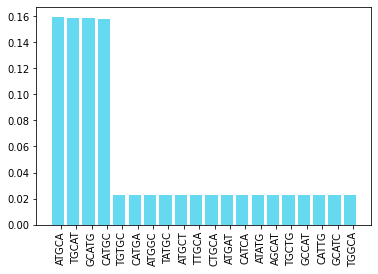

here
there
20


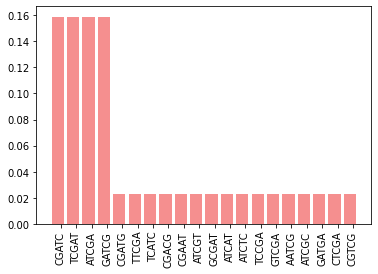

In [4]:
#make words strings.
h_DNA = np.array([[''.join(h_DNA[i,j,:]) for i in range(h_DNA.shape[0]) ]for 
                  j in range(h_DNA.shape[1])])
#make words strings.
n_DNA = np.array([[''.join(n_DNA[i,j,:]) for i in range(n_DNA.shape[0]) ]for 
                  j in range(n_DNA.shape[1])])

print(h_DNA.shape)

h_DNA_check= h_DNA.reshape(DNA_length//word_length)
n_DNA_check= n_DNA.reshape(DNA_length//word_length)
display(h_DNA_check)
h_DNA_check1=[]
n_DNA_check1=[]



from collections import Counter
import matplotlib.pyplot as  plt


##HUMAN
print("here")
counts_h=dict(Counter(h_DNA_check).most_common(20))
print("there")
labels_h, values_h = zip(*counts_h.items())

#sort
indsort_h = np.argsort(values_h)[::-1]

#re_arrange
labels_h= np.array(labels_h)[indsort_h]
values_h= np.array(values_h)[indsort_h]
indexes_h = np.arange(len(values_h))
bar_width=0.2

plt.bar(indexes_h, values_h/sum(values_h), color = "#64D9F0")
plt.xticks(indexes_h+bar_width,labels_h, rotation= 90)
print(len(counts_h))
plt.savefig('MonteCarlo_humans.png',bbox_inches='tight')
plt.show()

##NEANDERTHAL
print("here")
counts_n=dict(Counter(n_DNA_check).most_common(20))
print("there")
labels_n, values_n = zip(*counts_n.items())

#sort
indsort_n = np.argsort(values_n)[::-1]

#re_arrange
labels_n= np.array(labels_n)[indsort_n]
values_n= np.array(values_n)[indsort_n]
indexes_n = np.arange(len(values_n))
bar_width=0.2
plt.bar(indexes_n, values_n/sum(values_n), color = "#F58F8F")
plt.xticks(indexes_n+bar_width,labels_n, rotation= 90)
print(len(counts_n))
plt.savefig('MonteCarlo_neanderthal.png',bbox_inches='tight')
plt.show()

## Prepare Data for NN

In [5]:

h_DNA_NN=[' '.join(h_DNA[i,:]) for i in range(h_DNA.shape[0])]
n_DNA_NN=[' '.join(n_DNA[i,:]) for i in range(n_DNA.shape[0])]

DNA_NN = h_DNA_NN+n_DNA_NN
Y = [1]*len(h_DNA_NN)+[0]*len(n_DNA_NN)


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(DNA_NN)

encoded_docs = tokenizer.texts_to_sequences(DNA_NN)
max_length = max([len(s.split()) for s in DNA_NN])
X = pad_sequences(encoded_docs, maxlen = max_length, padding = 'post')


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, shuffle = True)

print(X_train.shape)
print(len(Y_train))

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

Using TensorFlow backend.


(28800, 200)
28800
1025


## Lets' build CNN

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           32800     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 193, 2)            514       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 96, 2)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 965       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 34,285
Trainable params: 34,285
Non-trainable params: 0
__________________________________________________

/home/edoardospadetto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  # Remove the CWD from sys.path while we load stuff.


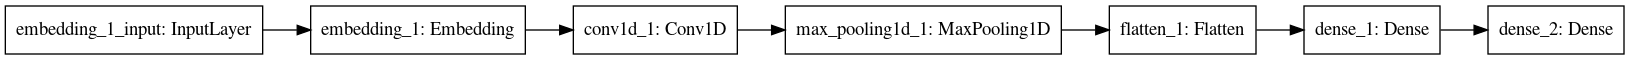

In [6]:
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
from keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU
from keras import regularizers
import keras.utils

model = Sequential()
model.add(Embedding(vocab_size, 32, input_length = max_length, dropout = 0.2))
#model.add(SimpleRNN(10, dropout = 0.2, recurrent_dropout = 0.2))  #this sucks
#model.add(LSTM(10, dropout = 0.2, recurrent_dropout = 0.2))  #totally killing it
model.add(Conv1D(filters=2,
               kernel_size=8,
               strides=1,
               activation='relu')) 
model.add(MaxPooling1D(pool_size=2)) 
model.add(Flatten())

model.add(Dense(5,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
checkpoint = ModelCheckpoint("weights.best.hdf5", monitor = 'val_acc', verbose = 1, 
                             save_best_only = True, mode = 'max')
print(model.summary())


keras.utils.plot_model(model, rankdir="LR",  to_file="Monte_Carlo_CNN.png")

In [7]:
import time
epochs = 10
start_time = time.time()
history = model.fit(X_train, Y_train, 
                    epochs = epochs, verbose = 1, validation_split = 0.2, batch_size = 32, shuffle = True, 
                    callbacks = [checkpoint])
print(time.time()-start_time)

/home/edoardospadetto/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 23040 samples, validate on 5760 samples
Epoch 1/10
23040/23040 [==============================] - 8s 364us/step - loss: 0.7024 - accuracy: 0.4954 - val_loss: 0.6941 - val_accuracy: 0.4977
Epoch 2/10
  448/23040 [..............................] - ETA: 9s - loss: 0.6940 - accuracy: 0.5134

/home/edoardospadetto/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


23040/23040 [==============================] - 7s 320us/step - loss: 0.6940 - accuracy: 0.4964 - val_loss: 0.6938 - val_accuracy: 0.4977
Epoch 3/10
23040/23040 [==============================] - 7s 314us/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.4977
Epoch 4/10
23040/23040 [==============================] - 8s 345us/step - loss: 0.6940 - accuracy: 0.4979 - val_loss: 0.6940 - val_accuracy: 0.5023
Epoch 5/10
23040/23040 [==============================] - 7s 317us/step - loss: 0.5763 - accuracy: 0.9812 - val_loss: 0.4896 - val_accuracy: 1.0000
Epoch 6/10
23040/23040 [==============================] - 7s 313us/step - loss: 0.4437 - accuracy: 1.0000 - val_loss: 0.3993 - val_accuracy: 1.0000
Epoch 7/10
23040/23040 [==============================] - 8s 332us/step - loss: 0.3684 - accuracy: 1.0000 - val_loss: 0.3384 - val_accuracy: 1.0000
Epoch 8/10
23040/23040 [==============================] - 7s 318us/step - loss: 0.3166 - accuracy: 1.0000 - val_loss: 0.295

## Let's build an LSTM NN




1025


/home/edoardospadetto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  if __name__ == '__main__':


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 1)            1025      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 1,053
Trainable params: 1,053
Non-trainable params: 0
_________________________________________________________________
None


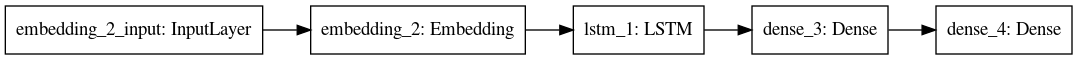

In [8]:
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
from keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU
from keras import regularizers
print(vocab_size)
model = Sequential()
model.add(Embedding(vocab_size, 1, input_length = max_length, dropout = 0.2))
#model.add(SimpleRNN(10, dropout = 0.2, recurrent_dropout = 0.2))  #this sucks
model.add(LSTM(1, dropout = 0.2, recurrent_dropout = 0.2))  #totally killing it
#model.add(Conv1D(10, dropout = 0.2, recurrent_dropout = 0.2)) 

model.add(Dense(5,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
checkpoint = ModelCheckpoint("weights.best.hdf5", monitor = 'val_acc', verbose = 1, 
                             save_best_only = True, mode = 'max')
print(model.summary())

keras.utils.plot_model(model, rankdir="LR",  to_file="Monte_Carlo_LSTM.png")

In [10]:
epochs = 5
start_time = time.time()
history = model.fit(X_train, Y_train, 
                    epochs = epochs, verbose = 1, validation_split = 0.2, batch_size = 32, shuffle = True, 
                    callbacks = [checkpoint])

print(time.time()-start_time)

Train on 23040 samples, validate on 5760 samples
Epoch 1/5
23040/23040 [==============================] - 132s 6ms/step - loss: 0.6988 - accuracy: 0.5066 - val_loss: 0.6937 - val_accuracy: 0.4977
Epoch 2/5
   32/23040 [..............................] - ETA: 2:20 - loss: 0.6942 - accuracy: 0.4375

/home/edoardospadetto/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


23040/23040 [==============================] - 132s 6ms/step - loss: 0.6105 - accuracy: 0.8730 - val_loss: 0.4542 - val_accuracy: 0.9998
Epoch 3/5
23040/23040 [==============================] - 132s 6ms/step - loss: 0.4636 - accuracy: 0.8998 - val_loss: 0.3604 - val_accuracy: 0.9998
Epoch 4/5
23040/23040 [==============================] - 132s 6ms/step - loss: 0.4074 - accuracy: 0.8964 - val_loss: 0.3051 - val_accuracy: 0.9998
Epoch 5/5
23040/23040 [==============================] - 136s 6ms/step - loss: 0.3704 - accuracy: 0.9016 - val_loss: 0.2677 - val_accuracy: 0.9998
664.2564325332642


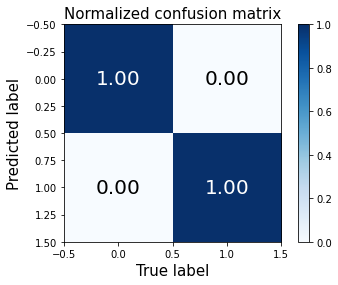

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

predicted_labels = model.predict(X_test)
cm = confusion_matrix(Y_test, [np.round(i[0]) for i in predicted_labels])
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]



plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Normalized confusion matrix', fontsize = 15)
plt.colorbar()
plt.xlabel('True label', fontsize = 15)
plt.ylabel('Predicted label', fontsize = 15)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20,
             color='white' if cm[i, j] > 0.5 else 'black')
plt.show()

## Eigen Vector $\lambda = 1$ is the stationary PDF 

In [12]:
#IMPORTANT -> check that the eigenvalue is 1!!
w_e = 0 #where is the right eigenvalue? 
j_mtx_hg=np.array(j_mtx_h).T
j_mtx_ng=np.array(j_mtx_n).T
eigv_human= np.real(np.linalg.eig(j_mtx_hg)[1][:,w_e]/sum(np.linalg.eig(j_mtx_hg)[1][:,w_e]))
eigv_nean= np.real(np.linalg.eig(j_mtx_ng)[1][:,w_e]/sum(np.linalg.eig(j_mtx_ng)[1][:,w_e]))
print(eigv_nean)
print(np.linalg.eig(j_mtx_ng)[1][:,w_e]/sum(np.linalg.eig(j_mtx_ng)[1][:,w_e]) , np.linalg.eig(j_mtx_ng)[0][w_e])
print()
print(eigv_human)
print(np.linalg.eig(j_mtx_hg)[1][:,w_e]/sum(np.linalg.eig(j_mtx_hg)[1][:,w_e]) , np.linalg.eig(j_mtx_ng)[0][w_e])

[0.25 0.25 0.25 0.25]
[0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j] (0.9999999999999993+0j)

[0.25 0.25 0.25 0.25]
[0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j] (0.9999999999999993+0j)


['A', 'T', 'G', 'C']
['A', 'C', 'T', 'G']
[0, 1, 3, 2]
[0.25 0.25 0.25 0.25]


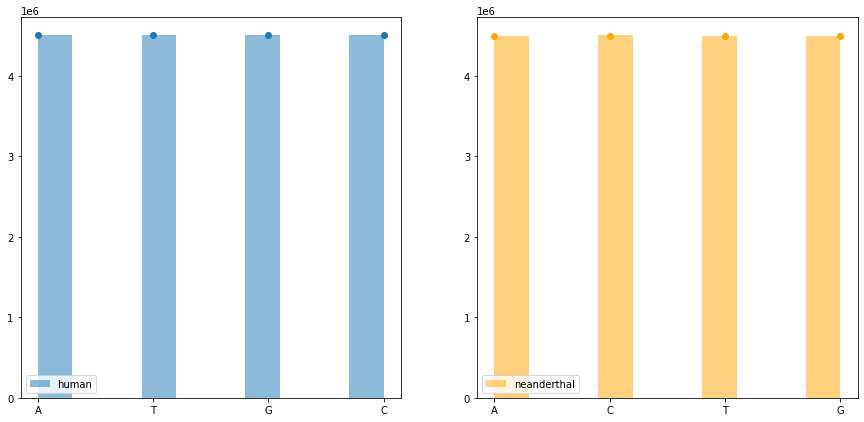

In [13]:
#I didn't managed to make the distribution always overlap with th_prob... 
#if you found an error tell me

#original order ACGT, can be changed from the hist code
og_dict= {'A' : 0,'C':1, 'G':2, 'T':3 }

tmp0 =list(dict.fromkeys(human_DNA))
tmp1 =list(dict.fromkeys(neanderthal_DNA))
print(tmp0)
print(tmp1)
#print(human_DNA[:15])
#print(neanderthal_DNA[:15])

fig,ax=plt.subplots(1,2, figsize=(15,7))
ax[0].hist(human_DNA, alpha =0.5, label= 'human')
ax[1].hist(neanderthal_DNA, alpha =0.5, label= 'neanderthal', color = 'orange')
ax[0].legend()
ax[0].scatter(range(0,len(eigv_human)),np.array(eigv_human[[og_dict[k] for k in tmp0]]*DNA_length))
ax[1].scatter(range(0,len(eigv_nean)),eigv_nean[[og_dict[k] for k in tmp1]]*DNA_length, color = 'orange')
ax[1].legend()
#ax[1].set_xticklabels(["" ,og_dict[tm],"", "C","","G", "","T"])
print([og_dict[k] for k in tmp1])

print(eigv_nean[[og_dict[k] for k in tmp1]])


In [14]:
print(np.sum(j_mtx_h, axis= 0))
display(pd.DataFrame([eigv_human,['A','C','G','T']]))
display(pd.DataFrame([eigv_nean,['A','C','G','T']]))

[1. 1. 1. 1.]


,0,1,2,3
0,0.25,0.25,0.25,0.25
1,A,C,G,T


,0,1,2,3
0,0.25,0.25,0.25,0.25
1,A,C,G,T
